# Data reading

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [5]:
Train_data = pd.read_csv('train.csv')
Test_data = pd.read_csv('test.csv')
Train_data.dropna(inplace=True)
Test_data.dropna(inplace=True)
X_train = Train_data.iloc[:10000, :-1]
Y_train = Train_data.iloc[:10000, -1]
X_test = Test_data.iloc[:3000, :-1]
Y_test = Test_data.iloc[:3000, -1]

In [6]:
X_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,10021,101711,Female,Loyal Customer,23,Personal Travel,Eco,1624,3,3,...,2,2,4,4,5,3,4,2,45,35.0
10022,10022,96505,Male,disloyal Customer,59,Business travel,Eco,302,1,1,...,1,1,2,3,3,3,3,1,38,38.0
10023,10023,104428,Female,Loyal Customer,32,Business travel,Business,2841,5,5,...,4,4,5,2,5,4,5,4,3,1.0
10024,10024,47516,Female,Loyal Customer,14,Personal Travel,Eco,599,1,4,...,3,3,4,5,3,2,4,3,86,88.0


In [7]:
X_train.drop(["Unnamed: 0","id"], axis=1, inplace=True)
X_test.drop(["Unnamed: 0","id"], axis=1, inplace=True)

In [8]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,Female,Loyal Customer,23,Personal Travel,Eco,1624,3,3,3,1,...,2,2,4,4,5,3,4,2,45,35.0
10022,Male,disloyal Customer,59,Business travel,Eco,302,1,1,1,4,...,1,1,2,3,3,3,3,1,38,38.0
10023,Female,Loyal Customer,32,Business travel,Business,2841,5,5,5,5,...,4,4,5,2,5,4,5,4,3,1.0
10024,Female,Loyal Customer,14,Personal Travel,Eco,599,1,4,1,3,...,3,3,4,5,3,2,4,3,86,88.0


In [9]:
X_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,Male,disloyal Customer,26,Business travel,Business,1091,2,2,2,3,...,4,4,5,5,3,2,4,4,0,0.0
3005,Male,disloyal Customer,22,Business travel,Eco,448,4,2,4,2,...,1,3,5,2,1,1,3,3,35,27.0
3006,Female,disloyal Customer,22,Business travel,Business,515,3,4,3,4,...,1,1,3,3,3,3,4,1,0,4.0
3007,Male,Loyal Customer,41,Personal Travel,Eco,862,2,4,2,4,...,4,4,3,5,4,4,5,4,0,3.0


In [10]:

X_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,39.285500,1198.483100,2.731200,3.040100,2.753600,2.969400,3.207400,3.240000,3.410300,3.334600,3.365500,3.346400,3.620300,3.287300,3.62820,3.266900,14.880200,15.341900
std,15.124439,1001.517878,1.327977,1.527915,1.403098,1.284534,1.340211,1.350475,1.326473,1.340605,1.288827,1.311708,1.190239,1.268826,1.18123,1.321453,38.958332,39.440387
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,27.000000,413.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.00000,2.000000,0.000000,0.000000
50%,40.000000,853.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000,0.000000,0.000000
75%,51.000000,1747.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000,13.000000,14.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,1305.000000,1280.000000


In [11]:
Y_train.value_counts()

satisfaction
neutral or dissatisfied    5693
satisfied                  4307
Name: count, dtype: int64

In [12]:
Y_test.value_counts()

satisfaction
neutral or dissatisfied    1681
satisfied                  1319
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
labelencoder_Y = LabelEncoder()
X_train['Gender'] = labelencoder_X.fit_transform(X_train['Gender'])  
X_test['Gender'] = labelencoder_X.transform(X_test['Gender'])  

X_train['Customer Type'] = labelencoder_X.fit_transform(X_train['Customer Type'])
X_test['Customer Type'] = labelencoder_X.transform(X_test['Customer Type'])  

X_train['Type of Travel'] = labelencoder_X.fit_transform(X_train['Type of Travel'])
X_test['Type of Travel'] = labelencoder_X.transform(X_test['Type of Travel'])

X_train['Class'] = labelencoder_X.fit_transform(X_train['Class'])
X_test['Class'] = labelencoder_X.transform(X_test['Class'])

Y_train = labelencoder_Y.fit_transform(Y_train) 
Y_test = labelencoder_Y.transform(Y_test) 

In [14]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,0,0,23,1,1,1624,3,3,3,1,...,2,2,4,4,5,3,4,2,45,35.0
10022,1,1,59,0,1,302,1,1,1,4,...,1,1,2,3,3,3,3,1,38,38.0
10023,0,0,32,0,0,2841,5,5,5,5,...,4,4,5,2,5,4,5,4,3,1.0
10024,0,0,14,1,1,599,1,4,1,3,...,3,3,4,5,3,2,4,3,86,88.0


In [15]:
Y_train

array([0, 0, 1, ..., 1, 0, 0])

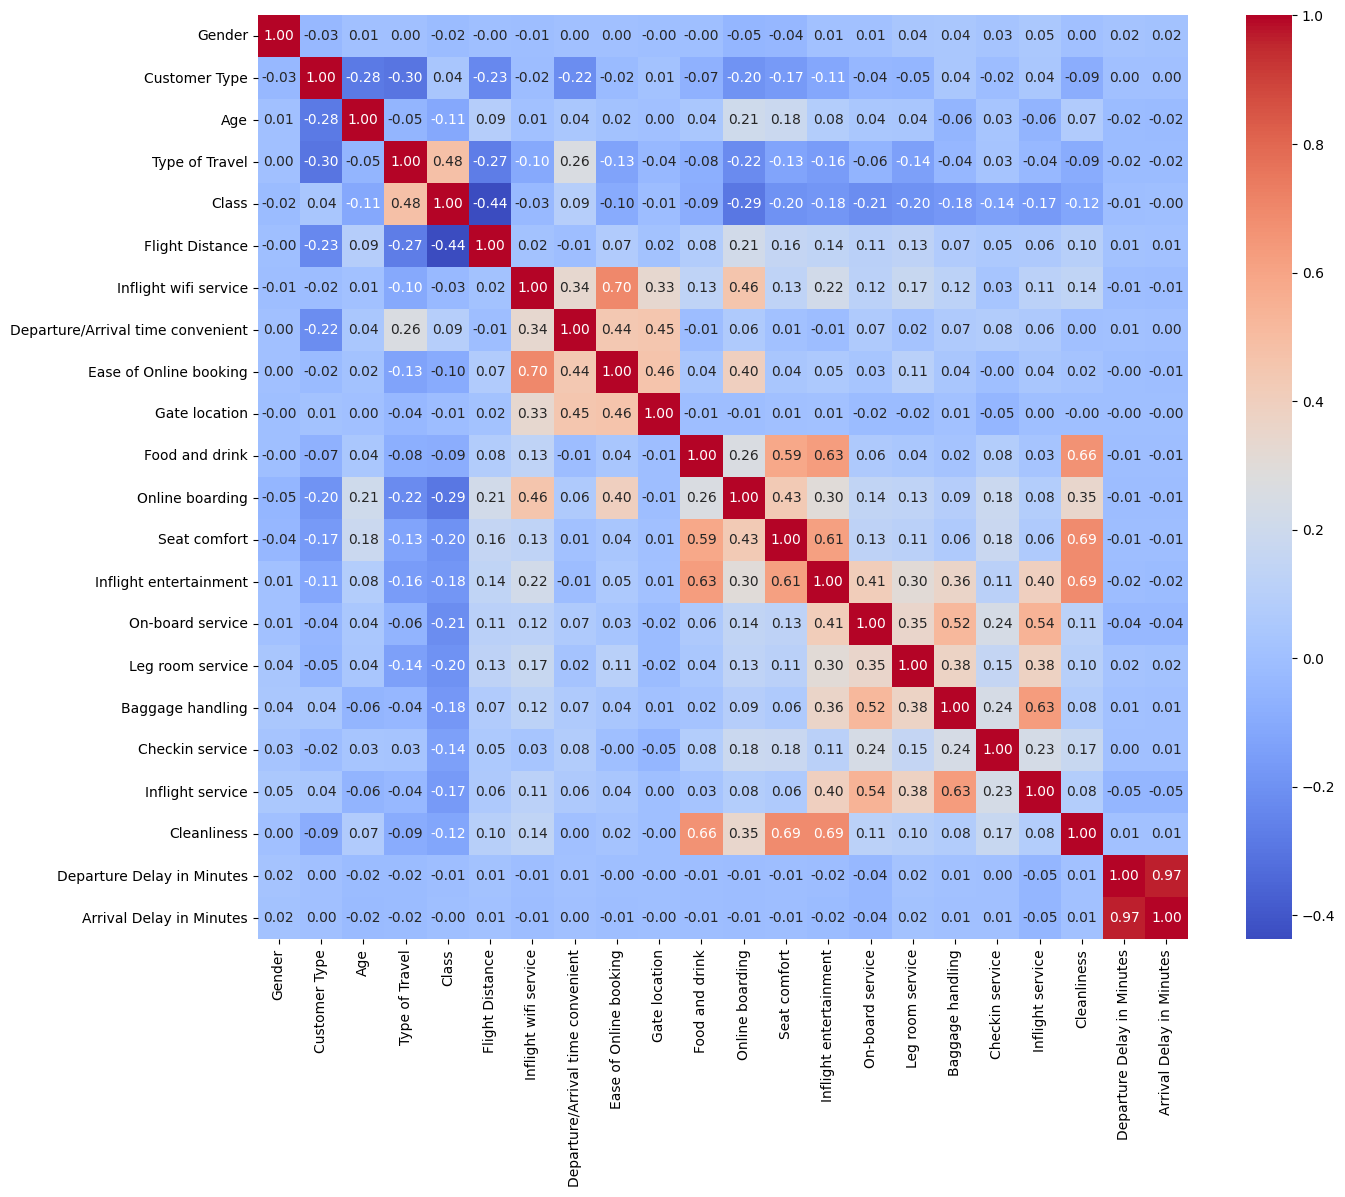

In [16]:
feature_names=X_train.keys()
corr = X_train.corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

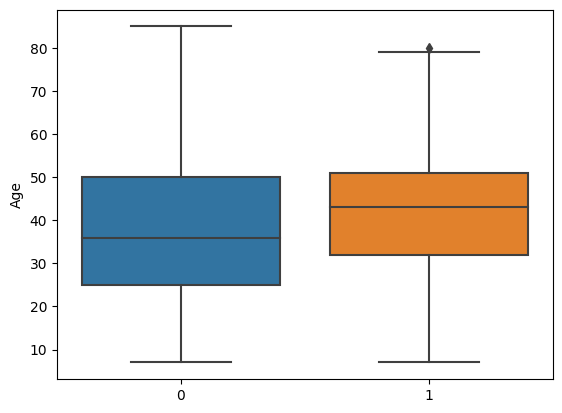

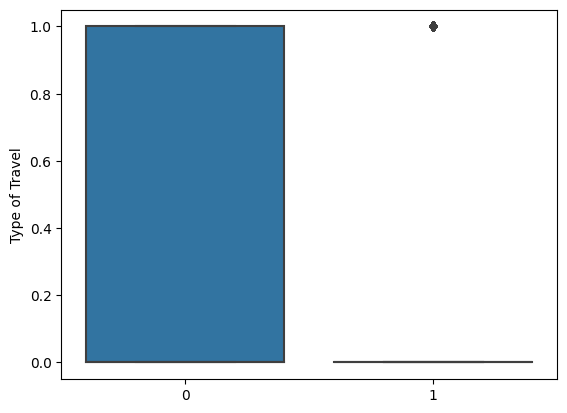

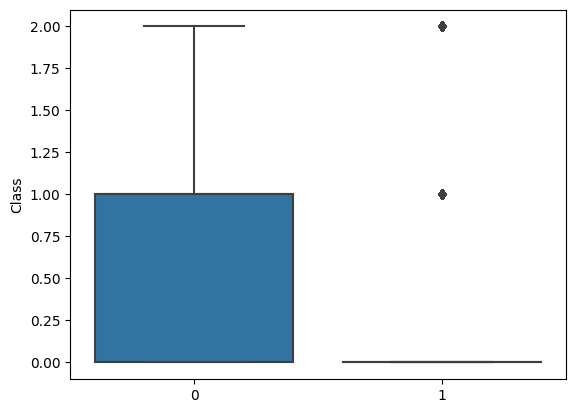

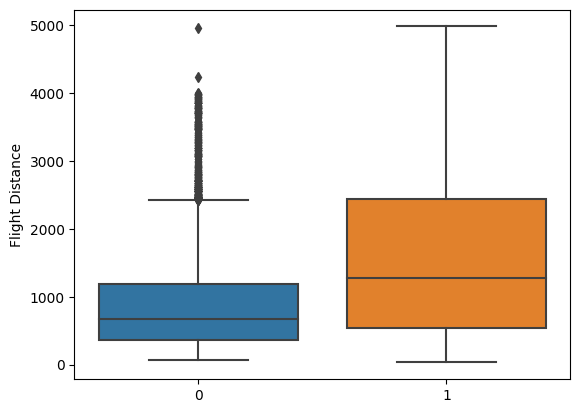

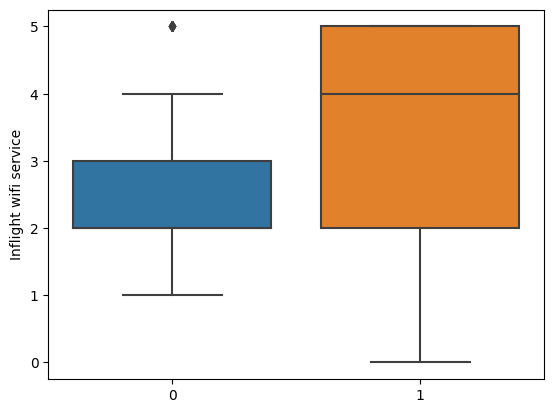

In [17]:
for i in range(5):
    figure = plt.figure()
    ax = sns.boxplot(x=Y_train, y=feature_names[i+2], data=X_train)

# Drop data with hight corelation

In [18]:
X_train.drop(["Departure Delay in Minutes"], axis=1, inplace=True)
X_test.drop(["Departure Delay in Minutes"], axis=1, inplace=True)
X_train_arr=X_train.values
X_test_arr=X_test.values

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

# KNN model clasification

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)

In [21]:
knn.fit(scaled_X_train, Y_train)

KNeighborsClassifier()

In [22]:
pred = knn.predict(scaled_X_test)

In [23]:
print(confusion_matrix(Y_test,pred))

[[1622   59]
 [ 192 1127]]


In [24]:
print(accuracy_score(Y_test,pred))

0.9163333333333333


# Chosing a K value

In [25]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,Y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != Y_test))

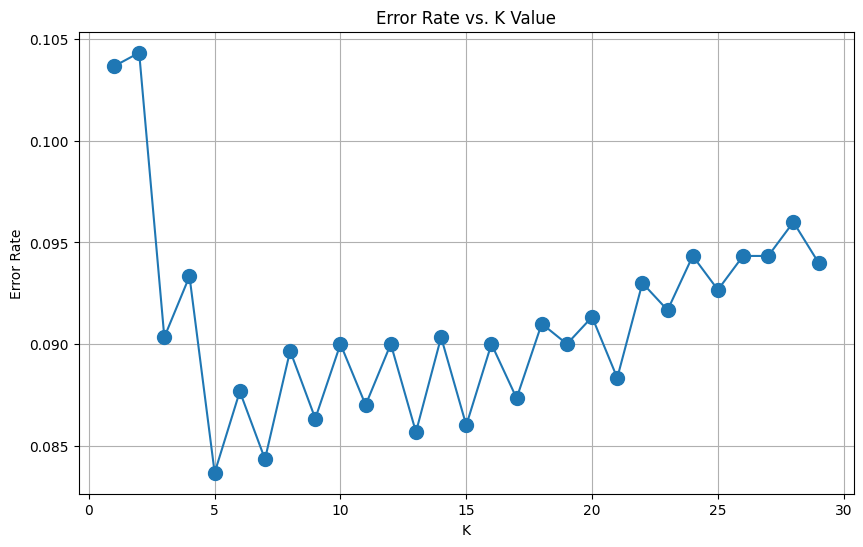

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(scaled_X_train,Y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[1622   59]
 [ 192 1127]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1681
           1       0.95      0.85      0.90      1319

    accuracy                           0.92      3000
   macro avg       0.92      0.91      0.91      3000
weighted avg       0.92      0.92      0.92      3000



In [28]:
KNN_acc=accuracy_score(Y_test,pred)
print(accuracy_score(Y_test,pred))

0.9163333333333333


## Suport Vector Machines

In [29]:
SVC_model= SVC(C=1.0, gamma=1, kernel = 'rbf')

In [30]:
SVC_model.fit(scaled_X_train,Y_train)

SVC(gamma=1)

In [31]:
pred_SVC = SVC_model.predict(scaled_X_test)
print(confusion_matrix(Y_test,pred_SVC))
print(classification_report(Y_test,pred_SVC))
print(accuracy_score(Y_test,pred_SVC))

[[1679    2]
 [ 816  503]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1681
           1       1.00      0.38      0.55      1319

    accuracy                           0.73      3000
   macro avg       0.83      0.69      0.68      3000
weighted avg       0.81      0.73      0.69      3000

0.7273333333333334


## Search of best hyper parameters for SVC

In [32]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [33]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [34]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [35]:
pred_SVC_grid = grid.predict(scaled_X_test)
print(confusion_matrix(Y_test,pred_SVC_grid))
print(classification_report(Y_test,pred_SVC_grid))
print(accuracy_score(Y_test,pred_SVC_grid))

[[1612   69]
 [ 116 1203]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1681
           1       0.95      0.91      0.93      1319

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000

0.9383333333333334


## Decision Tree Classifier

In [38]:
model_DTC = DecisionTreeClassifier(criterion='gini')
model_DTC.fit(scaled_X_train, Y_train)
pred_DTC = model_DTC.predict(scaled_X_test)
print(classification_report(Y_test,pred_DTC))
print(accuracy_score(Y_test,pred_DTC))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1681
           1       0.92      0.91      0.91      1319

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000

0.9216666666666666


## Random Fores Classifier

In [43]:
model_RFC = RandomForestClassifier(random_state=666,criterion='gini')
model_RFC.fit(scaled_X_train, Y_train)
pred_RFC = model_RFC.predict(scaled_X_test)
print(classification_report(Y_test,pred_RFC))
print(accuracy_score(Y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1681
           1       0.96      0.92      0.94      1319

    accuracy                           0.95      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.95      0.95      0.95      3000

0.9473333333333334


## AdaBoost Classifier

In [48]:
model_ADA = AdaBoostClassifier(n_estimators=100, random_state=666)
model_ADA.fit(scaled_X_train, Y_train)
pred_ADA = model_RFC.predict(scaled_X_test)
print(classification_report(Y_test,pred_ADA))
print(accuracy_score(Y_test,pred_ADA))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1681
           1       0.96      0.92      0.94      1319

    accuracy                           0.95      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.95      0.95      0.95      3000

0.9473333333333334


# The best accuracy obtained with Random Forest and AdaBoost Classifier